In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read the file
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Two categorical vaiabales needs to be converted to dummy variable
geography = pd.get_dummies(df['Geography'])
gender = pd.get_dummies(df['Gender'])

In [4]:
df = pd.concat([df, geography, gender], axis=1)
df = df.drop(['Geography', 'Gender'], axis=1)
df.shape

(10000, 17)

In [5]:
# Drop the columns with leass info within the independent feature and keep the dependent feature alone
x = df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df['Exited']
x.shape

(10000, 13)

In [6]:
# Split the input and test data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# scale the input features to reduce the biasness 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_test = sc.fit_transform(x_test)
x_train = sc.fit_transform(x_train)
x_train.shape, x_test.shape

((8000, 13), (2000, 13))

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Dense, Dropout

In [37]:
# Create your model
tf.random.set_seed = 42
model = Sequential([
    tf.keras.layers.Dense(10, activation = 'relu', kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'relu', kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss = tf.keras.losses.binary_crossentropy,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['Accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/100
800/800 [==============================] - 4s 4ms/step - loss: 0.6722 - Accuracy: 0.7329 - val_loss: 0.5302 - val_Accuracy: 0.8035
Epoch 2/100
800/800 [==============================] - 3s 4ms/step - loss: 0.5372 - Accuracy: 0.7915 - val_loss: 0.4928 - val_Accuracy: 0.8035
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 0.5103 - Accuracy: 0.7943 - val_loss: 0.4772 - val_Accuracy: 0.8035
Epoch 4/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4920 - Accuracy: 0.7945 - val_loss: 0.4591 - val_Accuracy: 0.8035
Epoch 5/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4869 - Accuracy: 0.7961 - val_loss: 0.4465 - val_Accuracy: 0.8035
Epoch 6/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4751 - Accuracy: 0.7979 - val_loss: 0.4330 - val_Accuracy: 0.8040
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4645 - Accuracy: 0.7946 - val_loss: 0.4234 - val_Accuracy: 0.8045

Epoch 58/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4106 - Accuracy: 0.8278 - val_loss: 0.3616 - val_Accuracy: 0.8550
Epoch 59/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4194 - Accuracy: 0.8221 - val_loss: 0.3657 - val_Accuracy: 0.8475
Epoch 60/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4196 - Accuracy: 0.8231 - val_loss: 0.3634 - val_Accuracy: 0.8525
Epoch 61/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4147 - Accuracy: 0.8315 - val_loss: 0.3645 - val_Accuracy: 0.8500
Epoch 62/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4166 - Accuracy: 0.8221 - val_loss: 0.3625 - val_Accuracy: 0.8535
Epoch 63/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4127 - Accuracy: 0.8248 - val_loss: 0.3635 - val_Accuracy: 0.8490
Epoch 64/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4172 - Accuracy: 0.8226 - val_loss: 0.3648 - val_Accuracy:

In [38]:
# make predictions with the test data you kept
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [39]:
# Find the accuracy of the model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)*100
print(f'the accuracy of this model is: {score}')

the accuracy of this model is: 85.45


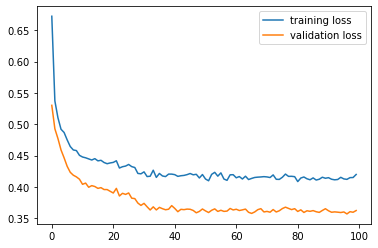

In [40]:
# check for overfitinh within the model by plotting the accuracy and the losses
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='training loss')
plt.plot(val_loss, label = 'validation loss')
plt.legend()


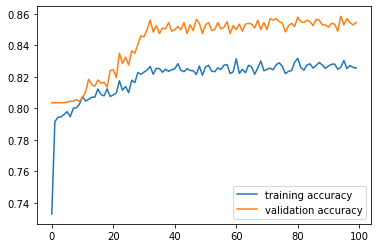

In [41]:
plt.plot(acc, label='training accuracy')
plt.plot(val_acc, label = 'validation accuracy')
plt.legend()